# Autoencoding

## One-hot Encoder

In [1]:
from conx import *

Using Theano backend.


In [2]:
size = 5

In [3]:
net = Network("Autoencoder")
net.add(Layer("input", size, minmax=(0,1)))
net.add(Layer("hidden", 5, activation="relu", visible=True))
net.add(Layer("output", size, activation="sigmoid"))
net.config["font_family"] = "monospace"

In [4]:
net.connect()

In [5]:
net.compile(error='binary_crossentropy', optimizer="adam")

<IPython.core.display.Javascript object>

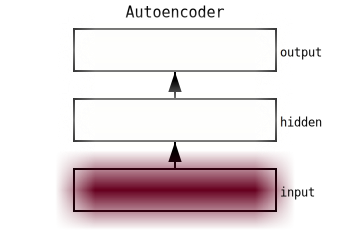

In [6]:
net

In [7]:
patterns = [one_hot(i, size) for i in range(size)]

In [8]:
patterns[0]

[1.0, 0.0, 0.0, 0.0, 0.0]

In [9]:
net.dataset.load([(p,p) for p in patterns])

<IPython.core.display.Javascript object>

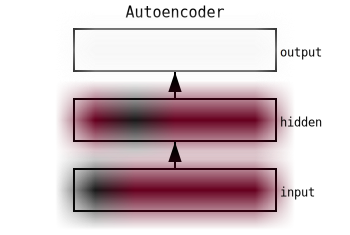

In [10]:
net

In [14]:
import time
for i in range(size):
    net.propagate(net.dataset.inputs[i])
    time.sleep(1)

In [15]:
net.dataset.summary()

Input Summary:
   count  : 5 (5 for training, 0 for testing)
   shape  : (5,)
   range  : (0.0, 1.0)
Target Summary:
   count  : 5 (5 for training, 0 for testing)
   shape  : (5,)
   range  : (0.0, 1.0)


In [16]:
net.train(accuracy=1, epochs=10000, report_rate=200, tolerance=0.4)

Training...
Epoch #  200 | train error 0.56206 | train accuracy 0.80000 | validate% 0.00000
Epoch #  400 | train error 0.44075 | train accuracy 0.84000 | validate% 0.20000
Epoch #  600 | train error 0.30318 | train accuracy 0.92000 | validate% 0.40000
Epoch #  800 | train error 0.21271 | train accuracy 0.96000 | validate% 0.60000
Epoch # 1000 | train error 0.15694 | train accuracy 0.96000 | validate% 0.80000
Epoch # 1200 | train error 0.12232 | train accuracy 0.96000 | validate% 0.80000
Epoch # 1400 | train error 0.10017 | train accuracy 1.00000 | validate% 0.80000
Epoch # 1600 | train error 0.08437 | train accuracy 1.00000 | validate% 0.80000
Epoch # 1623 | train error 0.08281 | train accuracy 1.00000 | validate% 1.00000


In [17]:
net.propagate(net.dataset.inputs[0])

[0.6001914143562317,
 0.3700225353240967,
 0.17603114247322083,
 0.1353157013654709,
 0.23260989785194397]

In [18]:
net.test()

Testing on training dataset...
# | inputs | targets | outputs | result
---------------------------------------
0 | [1.00, 0.00, 0.00, 0.00, 0.00] | [1.00, 0.00, 0.00, 0.00, 0.00] | [0.60, 0.37, 0.18, 0.14, 0.23] | X
1 | [0.00, 1.00, 0.00, 0.00, 0.00] | [0.00, 1.00, 0.00, 0.00, 0.00] | [0.03, 0.88, 0.00, 0.00, 0.02] | X
2 | [0.00, 0.00, 1.00, 0.00, 0.00] | [0.00, 0.00, 1.00, 0.00, 0.00] | [0.02, 0.00, 0.96, 0.01, 0.01] | correct
3 | [0.00, 0.00, 0.00, 1.00, 0.00] | [0.00, 0.00, 0.00, 1.00, 0.00] | [0.00, 0.02, 0.04, 0.98, 0.01] | correct
4 | [0.00, 0.00, 0.00, 0.00, 1.00] | [0.00, 0.00, 0.00, 0.00, 1.00] | [0.02, 0.03, 0.01, 0.01, 0.94] | correct
Total count: 5
Total percentage correct: 0.6


In [19]:
for i in range(size):
    net.propagate(net.dataset.inputs[i])
    time.sleep(1)

## MNIST Autoencoding

In [32]:
from conx import Network, Layer, FlattenLayer

In [33]:
net = Network("MNIST-Autoencoder")

In [34]:
net.add(Layer("input", (28,28,1)))
net.add(FlattenLayer("flatten"))
net.add(Layer("hidden1", 25, activation="relu"))
net.add(Layer("hidden2", 25, activation="relu"))
net.add(Layer("hidden3", 25, activation="relu"))
net.add(Layer("output", (28 * 28 * 1), vshape=(28, 28), activation="sigmoid"))

In [35]:
net.connect()
net.compile(error="binary_crossentropy", optimizer="adam")

In [36]:
net.dataset.get('mnist')
net.dataset.set_targets_from_inputs()
net.dataset.targets.reshape(0, (28 * 28))
net.dataset.summary()

Input Summary:
   count  : 70000 (70000 for training, 0 for testing)
   shape  : (28, 28, 1)
   range  : (0.0, 1.0)
Target Summary:
   count  : 70000 (70000 for training, 0 for testing)
   shape  : (784,)
   range  : (0.0, 1.0)


In [37]:
net.dashboard()

<IPython.core.display.Javascript object>

In [38]:
import numpy as np
image = np.random.rand(784).reshape((28, 28, 1))

In [39]:
output = net.propagate(image)

In [40]:
net.propagate_to("hidden3", image)

[0.18373441696166992,
 0.0,
 0.0,
 0.0,
 0.8644769191741943,
 0.6525561809539795,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.7655777335166931,
 0.0,
 0.0,
 0.36669686436653137,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1573561578989029,
 0.1413460224866867,
 0.0,
 0.0]

In [41]:
net.dataset.slice(100)

In [42]:
net.train(accuracy=0.5, epochs=1000, report_rate=100, tolerance=.4)

Training...
Epoch #  100 | train error 0.22614 | train accuracy 0.80055 | validate% 0.00000
Epoch #  200 | train error 0.16395 | train accuracy 0.80747 | validate% 0.00000
Epoch #  300 | train error 0.13499 | train accuracy 0.81085 | validate% 0.00000
Epoch #  400 | train error 0.11892 | train accuracy 0.81357 | validate% 0.00000
Epoch #  500 | train error 0.10837 | train accuracy 0.81503 | validate% 0.00000
Epoch #  600 | train error 0.09993 | train accuracy 0.81638 | validate% 0.01000
Epoch #  700 | train error 0.09347 | train accuracy 0.81713 | validate% 0.02000
Epoch #  800 | train error 0.08901 | train accuracy 0.81754 | validate% 0.07000
Epoch #  900 | train error 0.08594 | train accuracy 0.81793 | validate% 0.10000
Epoch # 1000 | train error 0.08368 | train accuracy 0.81814 | validate% 0.11000
Epoch # 1000 | train error 0.08368 | train accuracy 0.81814 | validate% 0.11000


In [97]:
for i in range(20):
    net.propagate(net.dataset.inputs[i])

In [98]:
net.test()

Testing on training dataset...


TypeError: type list doesn't define __round__ method

In [99]:
%debug

> /usr/local/lib/python3.5/dist-packages/conx/network.py(1700)<listcomp>()
   1698         truncated = len(vector) > max_length
   1699         return "[" + ", ".join([("%." + str(precision) + "f") % round(v, precision)
-> 1700                                 for v in vector[:max_length]]) + ("..." if truncated else "") + "]"
   1701 
   1702     def to_array(self) -> list:

ipdb> v
[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]
ipdb> q
